In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 20
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('hour.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
def extract_datefeatures(df):

    df["dteday"] = pd.to_datetime(df["dteday"])
    df["week"] = df["dteday"].dt.week
    df["weatherType"] = df.weathersit.map({1: "Clear", 2 : "Mist", 3 : "Light Snow", 4 :"Heavy Rain" })
    df["month_str"] = df.mnth.map({1: "January ", 2 : "February", 3 : "March", 4 : "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December" })
    df["Day_Name"] = df.weekday.map({6: "Saturday", 0 : "Sunday", 1 : "Monday", 2 :"Tuesday", 3 : "Wednesday", 4 : "Thursday", 5: "Friday" })
    df["SeasonName"] = df.season.map({1: "Spring", 2 : "summer", 3 : "fall", 4 :"winter"})
    return df
    
    
df = extract_datefeatures(df)

In [7]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,week,weatherType,month_str,Day_Name,SeasonName
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,52,Clear,January,Saturday,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,52,Clear,January,Saturday,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,52,Clear,January,Saturday,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,52,Clear,January,Saturday,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,52,Clear,January,Saturday,Spring


### Data Preprocesing - Checking Null values

In [8]:
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
week           0
weatherType    0
month_str      0
Day_Name       0
SeasonName     0
dtype: int64

In [12]:
# No null Vlaues in the data # :)#

In [14]:
# As Defined in the problem
#temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)

# Data is already Normalised, but will still take a look later

### Checking Correlations

In [9]:
sns.set(style="white")

In [10]:
crl = df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()

In [11]:
mask = np.zeros_like(crl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

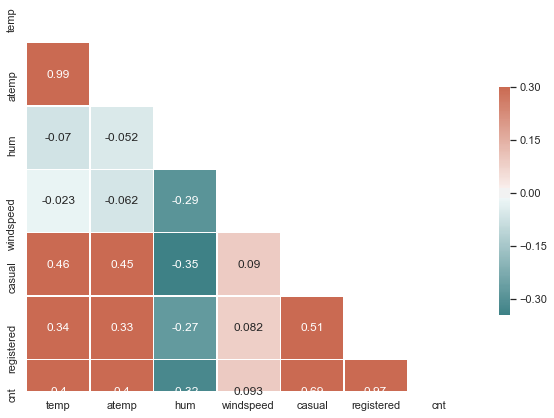

In [12]:
f, ax = plt.subplots(figsize=(10,7))
cmap=sns.diverging_palette(200,20, as_cmap=True)
sns.heatmap(crl,mask=mask, cmap=cmap,vmax=.3,center=0,annot=True, square= True, linewidth=.5,cbar_kws={"shrink":.6})

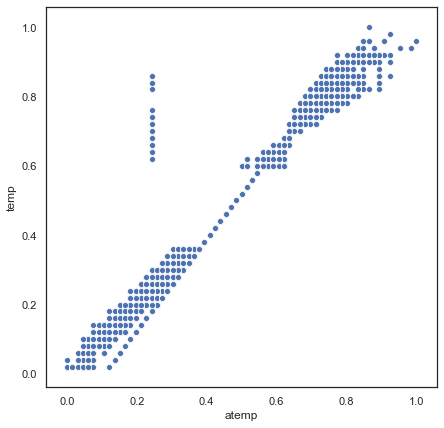

In [13]:
plt.figure(figsize=(7,7 ))
sns.scatterplot(df.atemp, df.temp)
plt.show()

In [26]:
# Strong Correlations between atemp and temp# They can not be considered together#

### Checking Overall distribution

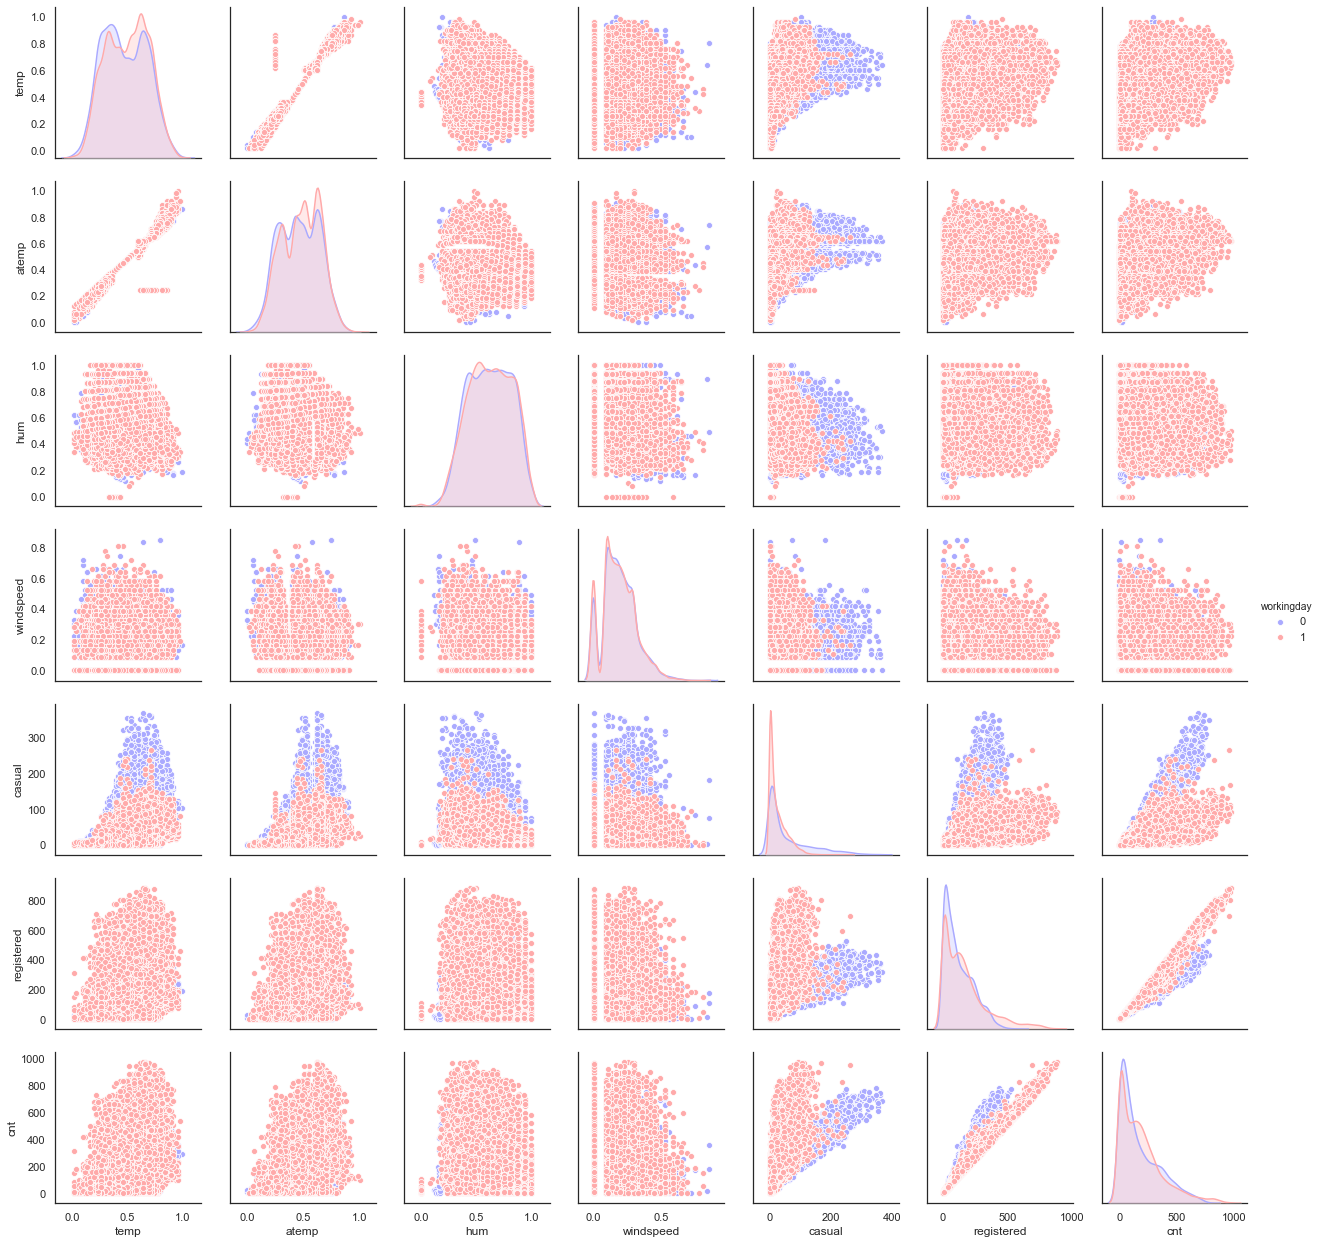

In [14]:
sns.pairplot(df,vars=["temp","atemp","hum","windspeed","casual","registered","cnt"], hue="workingday", palette="bwr")

In [73]:
# Casual user behabiour chnages more with external factors - 
#It probably makes sense to create two seperate models for Casual users and Registered Users#
# The Count looks to be skewed #

### Checking the count histogram

(0.0, 2910.0)

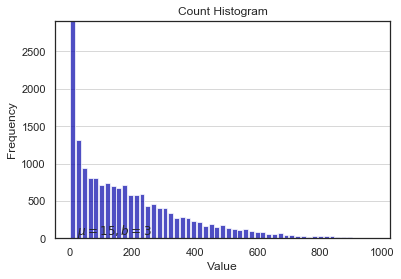

In [15]:


# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df["cnt"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Count Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [34]:
#lets try to fix that#

In [16]:
df["logy"] = np.log(df["cnt"])

(0.0, 1040.0)

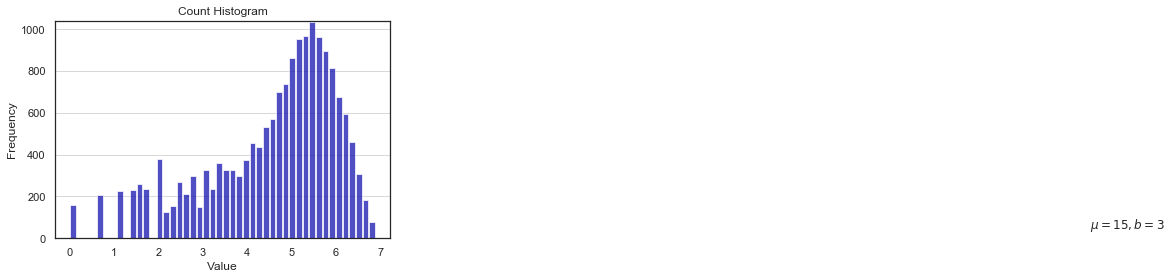

In [17]:

n, bins, patches = plt.hist(x=df["logy"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Count Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [18]:
# Better than before but looks like there could be some outliers#

In [19]:
df2 = df[np.abs(df["cnt"]-df["cnt"].mean())<=(3*df["cnt"].std())] 

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17135 entries, 0 to 17378
Data columns (total 23 columns):
instant        17135 non-null int64
dteday         17135 non-null datetime64[ns]
season         17135 non-null int64
yr             17135 non-null int64
mnth           17135 non-null int64
hr             17135 non-null int64
holiday        17135 non-null int64
weekday        17135 non-null int64
workingday     17135 non-null int64
weathersit     17135 non-null int64
temp           17135 non-null float64
atemp          17135 non-null float64
hum            17135 non-null float64
windspeed      17135 non-null float64
casual         17135 non-null int64
registered     17135 non-null int64
cnt            17135 non-null int64
week           17135 non-null int64
weatherType    17135 non-null object
month_str      17135 non-null object
Day_Name       17135 non-null object
SeasonName     17135 non-null object
logy           17135 non-null float64
dtypes: datetime64[ns](1), float64(5), i

(0.0, 1020.0)

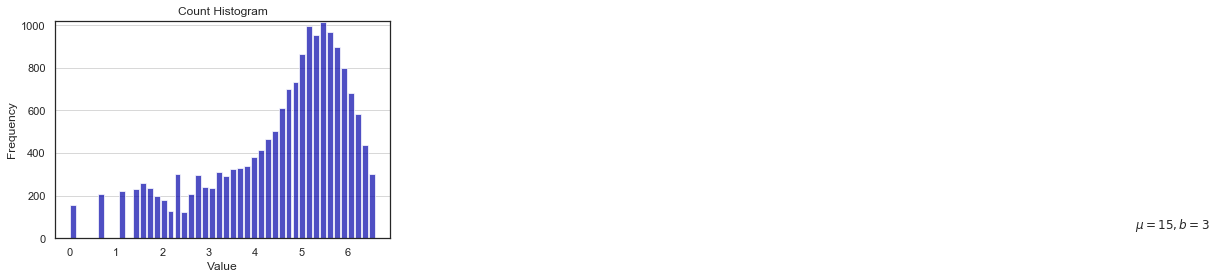

In [21]:
n, bins, patches = plt.hist(x=df2["logy"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Count Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [44]:
# much better ditribution#

### Exploring the data

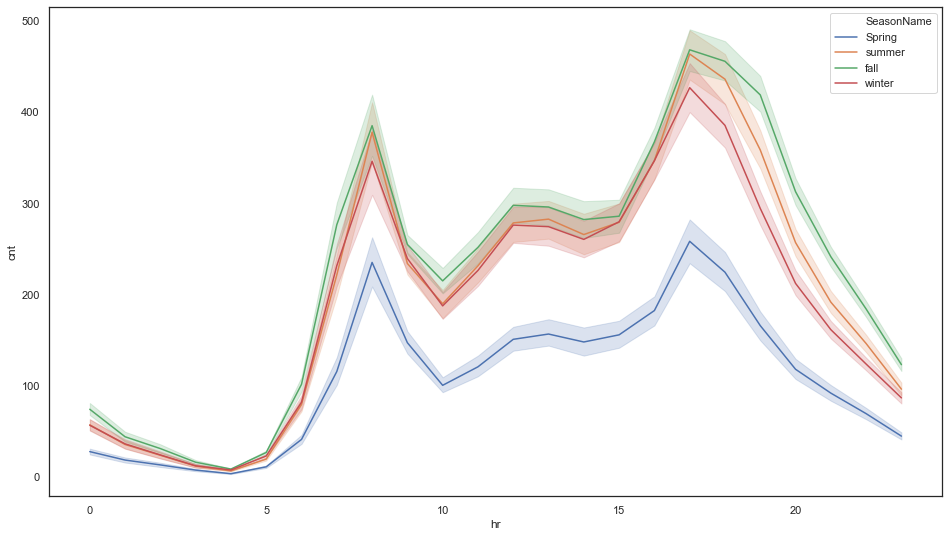

In [22]:
plt.figure(figsize=(16, 9))
sns.lineplot(x="hr", y="cnt", hue="SeasonName", data=df2)

In [46]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,week,weatherType,month_str,Day_Name,SeasonName,logy
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,52,Clear,January,Saturday,Spring,2.772589
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,52,Clear,January,Saturday,Spring,3.688879
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,52,Clear,January,Saturday,Spring,3.465736
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,3,10,13,52,Clear,January,Saturday,Spring,2.564949
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0,1,1,52,Clear,January,Saturday,Spring,0.000000


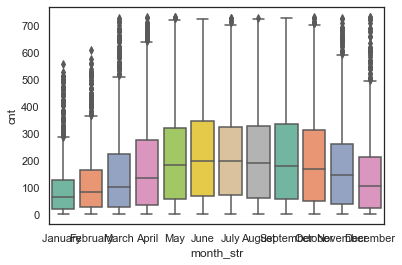

In [23]:
sns.boxplot(x="month_str", y="cnt", data=df2,palette="Set2")
#sns.swarmplot(x="month_str", y="cnt", data=df2, color=".25")

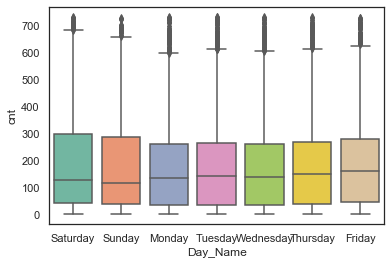

In [24]:
sns.boxplot(x="Day_Name", y="cnt", data=df2, palette="Set2")

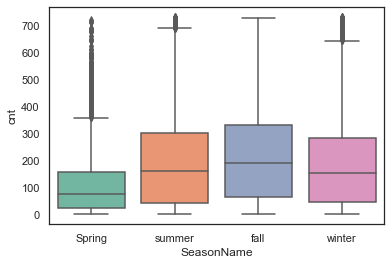

In [25]:
sns.boxplot(x="SeasonName", y="cnt", data=df2, palette="Set2")

### Getting the dataframe ready

In [57]:
#dropping unnecceary columns#

In [26]:
y=(df2["logy"])

In [27]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,week,weatherType,month_str,Day_Name,SeasonName,logy
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,52,Clear,January,Saturday,Spring,2.772589
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,52,Clear,January,Saturday,Spring,3.688879
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,52,Clear,January,Saturday,Spring,3.465736
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,3,10,13,52,Clear,January,Saturday,Spring,2.564949
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0,1,1,52,Clear,January,Saturday,Spring,0.000000


In [28]:
Xdrop= ["weatherType","month_str","Day_Name","SeasonName","logy","cnt","casual","registered","atemp","dteday","instant"]

In [29]:
X=df2.drop(columns=Xdrop)

In [30]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,week
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,52
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,52
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,52
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,52
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,52


In [31]:
y.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: logy, dtype: float64

### Linear regression

In [32]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.15168261  0.40476696  0.04161495  0.10204289 -0.19179357  0.01885797
 -0.07589114  0.00785048  2.06278938 -1.39378809  0.26405102 -0.00980439]


In [37]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

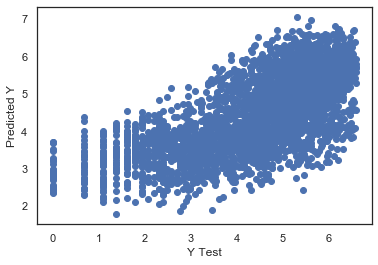

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [39]:
# Does not look good #

In [40]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8302667420484733
MSE: 1.1203908590487384
RMSE: 1.0584851718605879


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr = RandomForestRegressor(n_estimators=200)

In [43]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
predictions = rfr.predict( X_test)

Text(0, 0.5, 'Predicted Y')

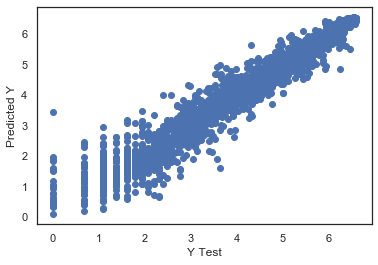

In [45]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
# Random Forrest is delivering much better result#

### Evaluation Metrics

In [47]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.21666280885325478
MSE: 0.11380117667300381
RMSE: 0.33734429989701


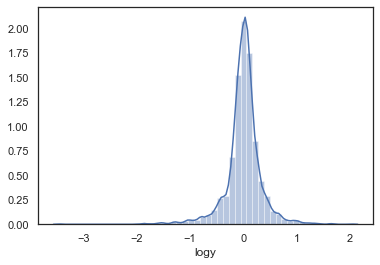

In [48]:
sns.distplot((y_test-predictions),bins=50);